# Data Bootcamp Final Project
####Explaining Music Popularity Using Audio Features and Machine Learning

Done by: Deema Hazim and Ameera Alrahmah

##Which audio features matter most for popularity?

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from datasets import load_dataset

In [3]:
# Load spotify tracks dataset
dataset = load_dataset("maharshipandya/spotify-tracks-dataset")
df = pd.DataFrame(dataset["train"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

dataset.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114000 [00:00<?, ? examples/s]

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
# Select the audio feature columns we want to analyze
audio_features = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

# Select features and target
df_model = df[audio_features + ['popularity']]

In [7]:
df_model.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,73
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,55
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,57
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,71
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,82


In [8]:
df_model.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,33.238535
std,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,22.305078
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,17.000000
50%,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,35.000000
75%,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,50.000000
max,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,100.000000


In [9]:
# Define features and target
X = df_model[audio_features]
y = df_model['popularity']

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# Create data frame of feature coefficients (shows the correlation with popularity)
coefficients = pd.DataFrame({
    'Feature': audio_features,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
0,danceability,1.593170
2,loudness,0.580323
8,tempo,0.436624
6,liveness,0.261692
4,acousticness,-0.466508
1,energy,-0.769545
3,speechiness,-1.291957
7,valence,-2.537125
5,instrumentalness,-2.577483


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Generate predictions for training and test sets
y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

# Evaluate the model performance on train and test data
# R-squared shows how well the model explains popularity
# while RMSE and MAE indicate the average error in predicted popularity
print("Model Performance:")
print(f"Train R-squared: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R-squared: {r2_score(y_test, y_pred_test):.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")

Model Performance:
Train R-squared: 0.023
Test R-squared: 0.020
Test RMSE: 21.99
Test MAE: 18.35


##**Can we classify songs as “hit” vs “non-hit”?**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Define what makes a song a "hit"
df['is_hit'] = (df['popularity'] >= 50).astype(int)

In [38]:
print("Hit Distribution:")
print(df['is_hit'].value_counts())

Hit Distribution:
is_hit
0    84633
1    29367
Name: count, dtype: int64


In [39]:
#Prepare the data (same features as before)
X = df[audio_features]
y = df['is_hit']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
#Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.746
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     17005
           1       0.50      0.00      0.00      5795

    accuracy                           0.75     22800
   macro avg       0.62      0.50      0.43     22800
weighted avg       0.68      0.75      0.64     22800



In [60]:
#Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}")
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.746
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     17005
           1       0.51      0.01      0.02      5795

    accuracy                           0.75     22800
   macro avg       0.63      0.50      0.44     22800
weighted avg       0.69      0.75      0.64     22800



In [61]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     17005
           1       0.88      0.48      0.62      5795

    accuracy                           0.85     22800
   macro avg       0.86      0.73      0.76     22800
weighted avg       0.85      0.85      0.83     22800



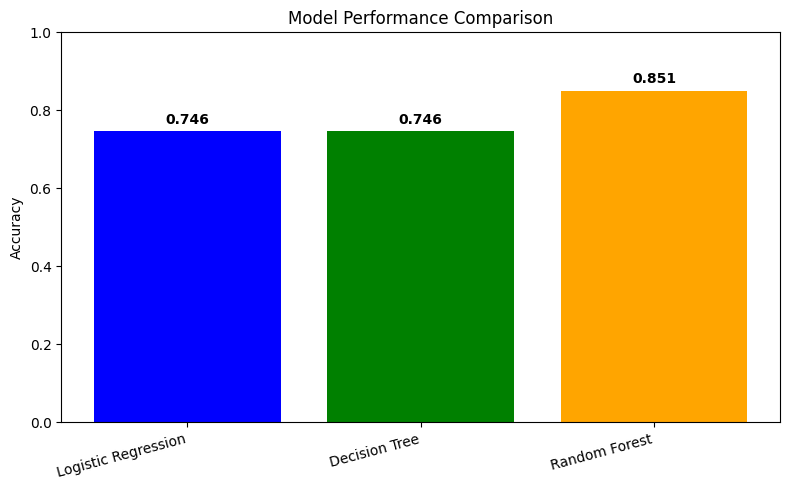

In [48]:
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ]
})

plt.figure(figsize=(8, 5))
plt.bar(models_comparison['Model'], models_comparison['Accuracy'], color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0, 1])
for i, v in enumerate(models_comparison['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

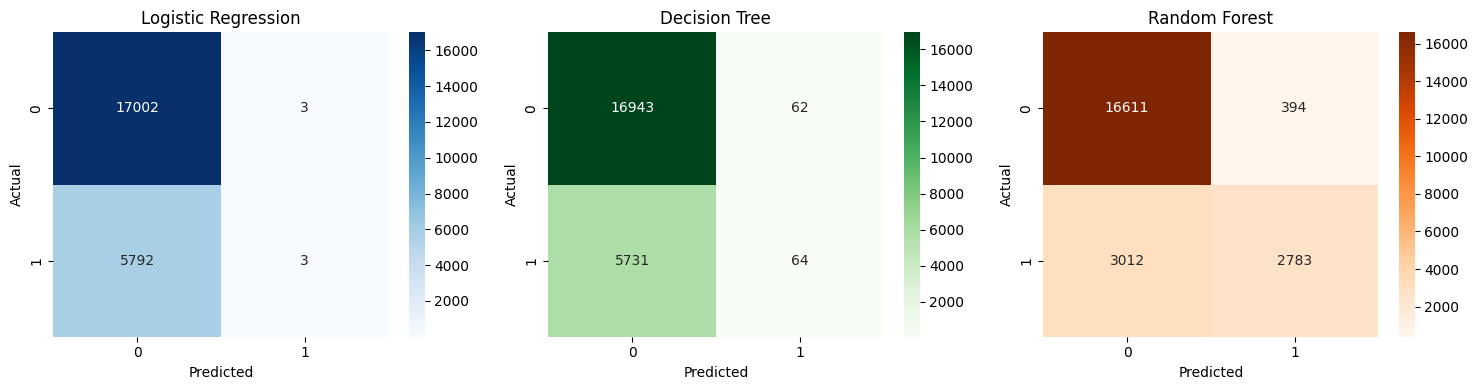

In [49]:
#Confusion Matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

#Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

#Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

#Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_ylabel('Actual')
axes[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

###Let us see if different hit thresholds matter

In [50]:
thresholds = [40, 50, 60, 70]

for threshold in thresholds:
    df['is_hit'] = (df['popularity'] >= threshold).astype(int)

    # How many hits?
    hit_pct = df['is_hit'].mean() * 100
    print(f"Threshold {threshold}: {hit_pct:.1f}% of songs are hits")

    # Train model
    y = df['is_hit']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)

    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")


=== Does the hit definition matter? ===

Threshold 40: 42.6% of songs are hits
  Accuracy: 0.775

Threshold 50: 25.8% of songs are hits
  Accuracy: 0.851

Threshold 60: 13.0% of songs are hits
  Accuracy: 0.933

Threshold 70: 4.8% of songs are hits
  Accuracy: 0.978



###Let us explore what makes hits different from non-hits

In [62]:
df['is_hit'] = (df['popularity'] >= 50).astype(int)
hits = df[df['is_hit'] == 1]
non_hits = df[df['is_hit'] == 0]

#Compare average features
comparison = pd.DataFrame({
    'Feature': audio_features,
    'Hits': [hits[f].mean() for f in audio_features],
    'Non-Hits': [non_hits[f].mean() for f in audio_features]
})
comparison['Difference'] = comparison['Hits'] - comparison['Non-Hits']
comparison = comparison.sort_values('Difference', ascending=False)

print(comparison.round(3))

            Feature     Hits  Non-Hits  Difference
2          loudness   -7.974    -8.358       0.384
0      danceability    0.582     0.562       0.020
3       speechiness    0.075     0.088      -0.013
1            energy    0.631     0.645      -0.014
4      acousticness    0.296     0.322      -0.026
7           valence    0.453     0.481      -0.029
6          liveness    0.185     0.223      -0.038
5  instrumentalness    0.115     0.170      -0.056
8             tempo  121.585   122.343      -0.758


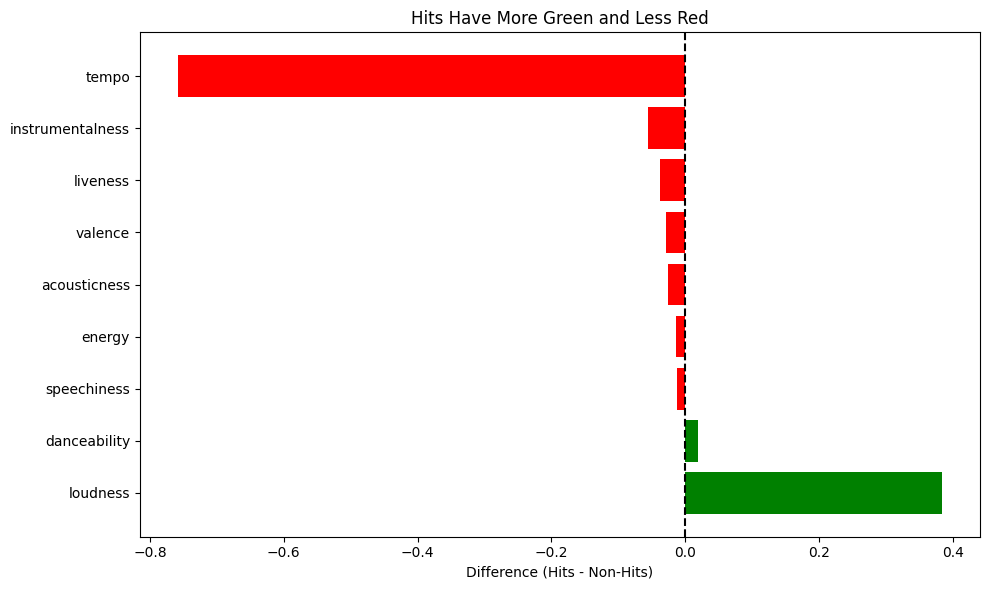

In [34]:
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in comparison['Difference']]
plt.barh(comparison['Feature'], comparison['Difference'], color=colors)
plt.xlabel('Difference (Hits - Non-Hits)')
plt.title('Hits Have More Green and Less Red')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

##**Do genre or artist popularity improve prediction accuracy?**

In [63]:
#Baseline: Audio Features Only (what we already have)
print("BASELINE: Audio Features Only")

df['is_hit'] = (df['popularity'] >= 50).astype(int)

X_audio = df[audio_features]
y = df['is_hit']

X_train, X_test, y_train, y_test = train_test_split(
    X_audio, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train_scaled, y_train)
y_pred_baseline = rf_baseline.predict(X_test_scaled)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Accuracy with only audio features: {baseline_accuracy:.3f}")

BASELINE: Audio Features Only
Accuracy with only audio features: 0.851


In [52]:
#Audio Features + Genre

#Create genre dummies (one-hot encoding)
genre_dummies = pd.get_dummies(df['track_genre'], prefix='genre')

#Combine audio features with genre
X_with_genre = pd.concat([df[audio_features], genre_dummies], axis=1)

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_with_genre, y, test_size=0.2, random_state=42
)

scaler_g = StandardScaler()
X_train_g_scaled = scaler_g.fit_transform(X_train_g)
X_test_g_scaled = scaler_g.transform(X_test_g)

rf_genre = RandomForestClassifier(n_estimators=100, random_state=42)
rf_genre.fit(X_train_g_scaled, y_train_g)
y_pred_genre = rf_genre.predict(X_test_g_scaled)

genre_accuracy = accuracy_score(y_test_g, y_pred_genre)
print(f"Accuracy with audio + genre: {genre_accuracy:.3f}")
print(f"Improvement: {(genre_accuracy - baseline_accuracy):.3f} ({((genre_accuracy - baseline_accuracy)/baseline_accuracy)*100:.1f}%)")

Accuracy with audio + GENRE: 0.825
Improvement: -0.025 (-3.0%)


In [53]:
#Audio features + artist popularity

# Calculate artist average popularity
artist_pop = df.groupby('artists')['popularity'].mean().to_dict()
df['artist_avg_popularity'] = df['artists'].map(artist_pop)

# Combine audio features with artist popularity
X_with_artist = df[audio_features + ['artist_avg_popularity']]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_with_artist, y, test_size=0.2, random_state=42
)

scaler_a = StandardScaler()
X_train_a_scaled = scaler_a.fit_transform(X_train_a)
X_test_a_scaled = scaler_a.transform(X_test_a)

rf_artist = RandomForestClassifier(n_estimators=100, random_state=42)
rf_artist.fit(X_train_a_scaled, y_train_a)
y_pred_artist = rf_artist.predict(X_test_a_scaled)

artist_accuracy = accuracy_score(y_test_a, y_pred_artist)
print(f"Accuracy with audio + artist: {artist_accuracy:.3f}")
print(f"Improvement: {(artist_accuracy - baseline_accuracy):.3f} ({((artist_accuracy - baseline_accuracy)/baseline_accuracy)*100:.1f}%)")

Accuracy with audio + ARTIST: 0.943
Improvement: 0.093 (10.9%)


In [54]:
#Audio + Genre + Artist

X_full = pd.concat([df[audio_features], genre_dummies, df[['artist_avg_popularity']]], axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

scaler_f = StandardScaler()
X_train_f_scaled = scaler_f.fit_transform(X_train_f)
X_test_f_scaled = scaler_f.transform(X_test_f)

rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_f_scaled, y_train_f)
y_pred_full = rf_full.predict(X_test_f_scaled)

full_accuracy = accuracy_score(y_test_f, y_pred_full)
print(f"Accuracy with all features: {full_accuracy:.3f}")
print(f"Improvement: {(full_accuracy - baseline_accuracy):.3f} ({((full_accuracy - baseline_accuracy)/baseline_accuracy)*100:.1f}%)")

Accuracy with EVERYTHING: 0.920
Improvement: 0.069 (8.1%)


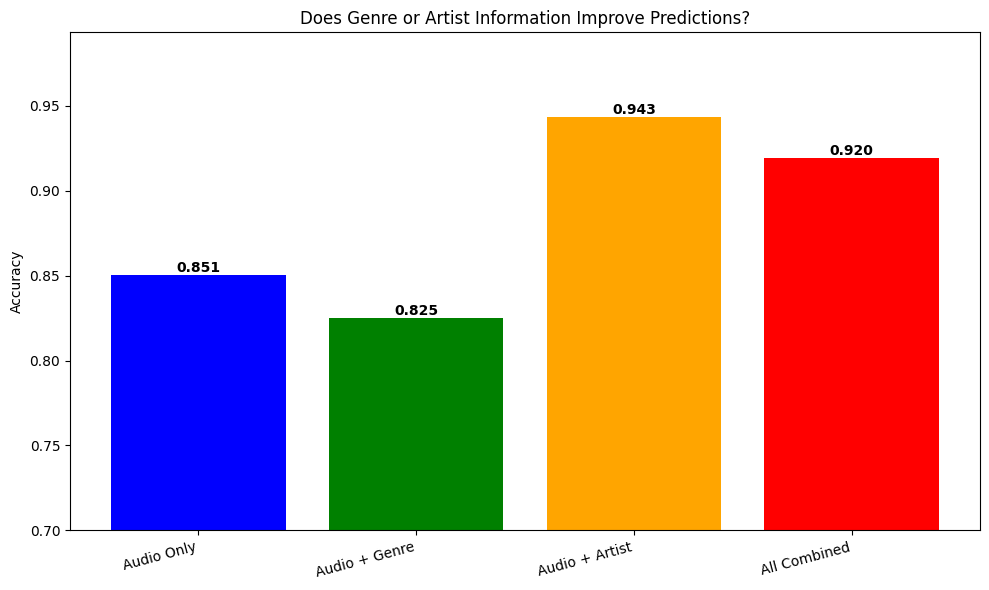

In [56]:
results_df = pd.DataFrame({
    'Model': ['Audio Only', 'Audio + Genre', 'Audio + Artist', 'All Combined'],
    'Accuracy': [baseline_accuracy, genre_accuracy, artist_accuracy, full_accuracy]
})

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Does Genre or Artist Information Improve Predictions?')
plt.ylim([0.7, max(results_df['Accuracy']) + 0.05])

# Add values on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

In [57]:
#Which Genres Have the Most Hits?

genre_hit_rate = df.groupby('track_genre').agg({
    'is_hit': ['mean', 'count']
}).round(3)
genre_hit_rate.columns = ['Hit_Rate', 'Total_Songs']
genre_hit_rate = genre_hit_rate[genre_hit_rate['Total_Songs'] >= 100]  #cOnly genres with 100+ songs
genre_hit_rate = genre_hit_rate.sort_values('Hit_Rate', ascending=False)

print("\nTop 10 Genres by Hit Rate:")
print(genre_hit_rate.head(10))


Top 10 Genres by Hit Rate:
                   Hit_Rate  Total_Songs
track_genre                             
pop-film              0.944         1000
chill                 0.783         1000
k-pop                 0.712         1000
sad                   0.696         1000
pop                   0.644         1000
grunge                0.637         1000
progressive-house     0.598         1000
deep-house            0.575         1000
hip-hop               0.572         1000
metal                 0.569         1000


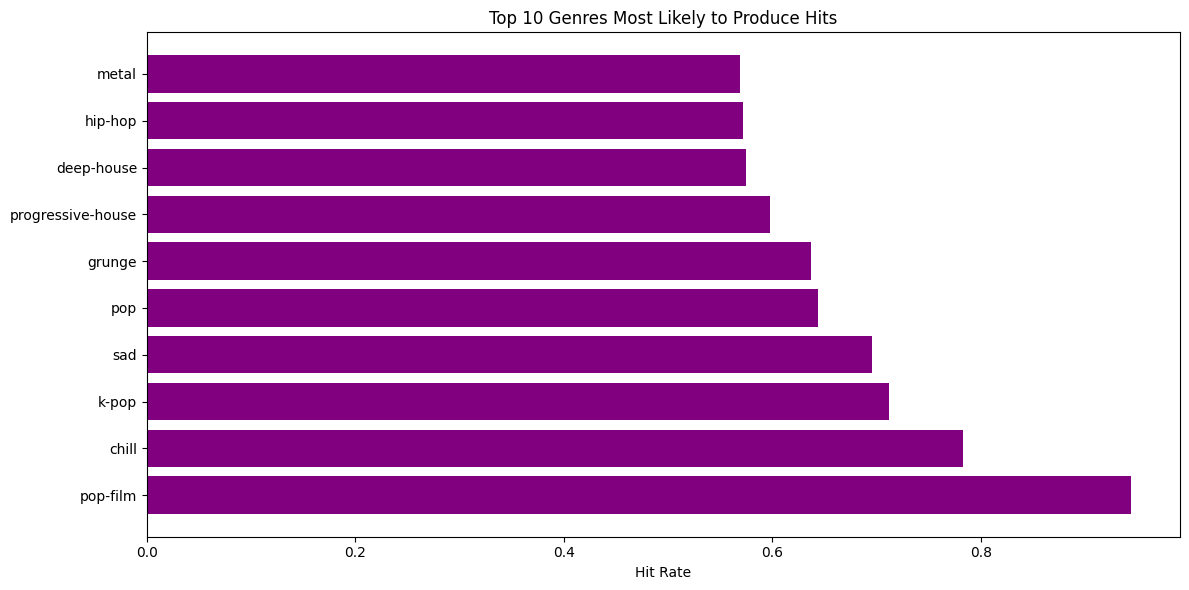

In [58]:
#Visualize top genres
plt.figure(figsize=(12, 6))
top_genres = genre_hit_rate.head(10)
plt.barh(top_genres.index, top_genres['Hit_Rate'], color='purple')
plt.xlabel('Hit Rate')
plt.title('Top 10 Genres Most Likely to Produce Hits')
plt.tight_layout()
plt.show()

##**Do audio features cluster into underlying dimensions that explain why certain features matter for hit prediction?**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Using PCA analysis

# Select the audio features and drop missing values
X = df[audio_features].dropna()

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
pca.fit(X_scaled)

# Display the variance explained by each principal component
variance = pca.explained_variance_ratio_ * 100
cumulative = np.cumsum(variance)

print("Variance explained by each component:")
for i in range(len(variance)):
    print(f"Component {i+1}: {variance[i]:.1f}% (Total: {cumulative[i]:.1f}%)")

Variance explained by each component:
Component 1: 31.9% (Total: 31.9%)
Component 2: 15.9% (Total: 47.8%)
Component 3: 13.5% (Total: 61.3%)
Component 4: 10.1% (Total: 71.4%)
Component 5: 9.9% (Total: 81.3%)
Component 6: 8.3% (Total: 89.6%)
Component 7: 5.2% (Total: 94.8%)
Component 8: 3.6% (Total: 98.4%)
Component 9: 1.6% (Total: 100.0%)


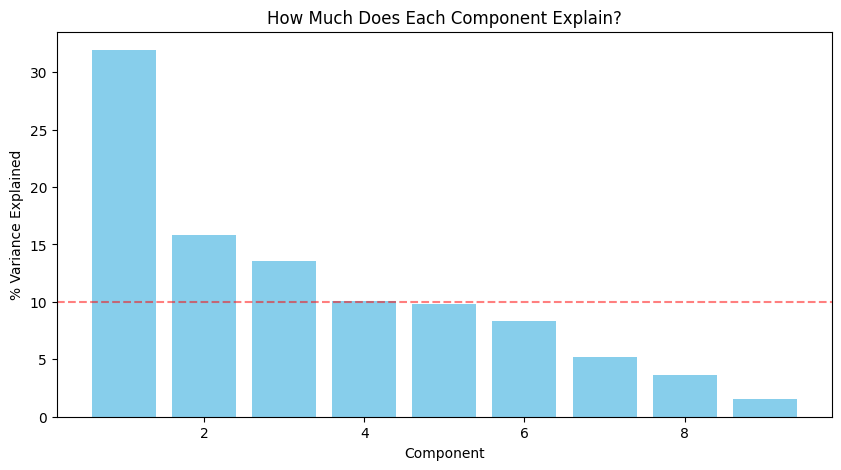

In [ ]:
# Plot the variance explained by each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(1, 10), variance, color='skyblue')
plt.xlabel('Component')
plt.ylabel('% Variance Explained')
plt.title('How Much Does Each Component Explain?')
plt.axhline(y=10, color='red', linestyle='--', alpha=0.5)
plt.show()


Feature Loadings:
                  Comp 1  Comp 2  Comp 3
danceability        0.25    0.57   -0.09
energy              0.51   -0.28   -0.01
loudness            0.52   -0.08   -0.06
speechiness         0.10    0.03    0.64
acousticness       -0.44    0.30    0.23
instrumentalness   -0.28   -0.31   -0.20
liveness            0.09   -0.23    0.68
valence             0.30    0.52    0.02
tempo               0.19   -0.28   -0.16


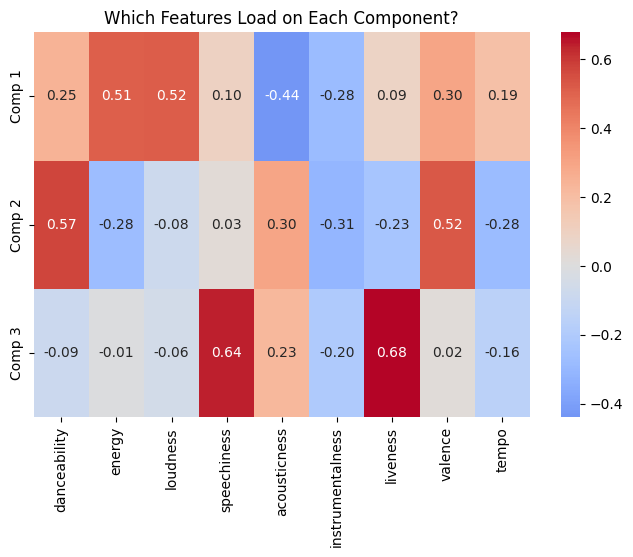

In [ ]:
# Create table and heatmap of feature loadings for the first three components
# (Only these 3 components are used because they each explain >10% of the variance)
loadings = pd.DataFrame(
    pca.components_[:3].T,
    columns=['Comp 1', 'Comp 2', 'Comp 3'],
    index=audio_features
)

print("\nFeature Loadings:")
print(loadings.round(2))

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Which Features Load on Each Component?')
plt.show()

In [ ]:
# Show top 3 features contributing to each of the first three components
print("\nInterpretation:")
print("\nComponent 1 - Top features:")
print(loadings['Comp 1'].abs().sort_values(ascending=False).head(3))

print("\nComponent 2 - Top features:")
print(loadings['Comp 2'].abs().sort_values(ascending=False).head(3))

print("\nComponent 3 - Top features:")
print(loadings['Comp 3'].abs().sort_values(ascending=False).head(3))


Interpretation:

Component 1 - Top features:
loudness        0.516955
energy          0.509169
acousticness    0.439340
Name: Comp 1, dtype: float64

Component 2 - Top features:
danceability        0.574753
valence             0.522034
instrumentalness    0.305671
Name: Comp 2, dtype: float64

Component 3 - Top features:
liveness        0.678620
speechiness     0.641286
acousticness    0.227287
Name: Comp 3, dtype: float64


In [ ]:
# Reduce to first 3 components
pca_3 = PCA(n_components=3)
components = pca_3.fit_transform(X_scaled)

# Add popularity
df_simple = pd.DataFrame({
    'Comp 1': components[:, 0],
    'Comp 2': components[:, 1],
    'Comp 3': components[:, 2],
    'popularity': df.loc[X.index, 'popularity'].values
})

# Compute correlation of each component with popularity
print("\nCorrelation with Popularity:")
for col in ['Comp 1', 'Comp 2', 'Comp 3']:
    corr = df_simple[col].corr(df_simple['popularity'])
    print(f"{col}: {corr:.3f}")


Correlation with Popularity:
Comp 1: 0.035
Comp 2: 0.011
Comp 3: -0.025
